In [2]:
import pandas as pd
import numpy as np
import os

In [2]:
df = pd.read_csv(r"G:\CleanedAllRowsMissingAreDeleted.csv")
df.head()

,age,gender,adjustmentdisorders,adltrespfl,alcoholrelateddisorders,allergy,amniosdx,analrectal,anemia,aneurysm,...,cc_vaginalpain,cc_weakness,cc_wheezing,cc_withdrawal-alcohol,cc_woundcheck,cc_woundinfection,cc_woundre-evaluation,cc_wristinjury,cc_wristpain,esi
0,70,Female,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1,88,Male,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2,21,Female,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
3,81,Male,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4,88,Female,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [3]:
df.describe() ## Descriping the statitics of the data

,age,adjustmentdisorders,adltrespfl,alcoholrelateddisorders,allergy,amniosdx,analrectal,anemia,aneurysm,anxietydisorders,...,cc_vaginalpain,cc_weakness,cc_wheezing,cc_withdrawal-alcohol,cc_woundcheck,cc_woundinfection,cc_woundre-evaluation,cc_wristinjury,cc_wristpain,esi
count,140364.000000,140364.000000,140364.000000,140364.000000,140364.000000,140364.000000,140364.000000,140364.000000,140364.000000,140364.000000,...,140364.000000,140364.000000,140364.000000,140364.000000,140364.000000,140364.000000,140364.000000,140364.000000,140364.000000,140364.000000
mean,50.232738,0.001824,0.006604,0.048787,0.051837,0.000192,0.004980,0.083633,0.010779,0.215005,...,0.000712,0.012760,0.001154,0.001090,0.005122,0.003512,0.001610,0.001439,0.002935,3.079258
std,19.441877,0.042668,0.080998,0.215424,0.221698,0.013868,0.070393,0.276837,0.103262,0.410827,...,0.026948,0.112236,0.033953,0.032998,0.071388,0.059161,0.040094,0.037909,0.054230,0.806028
min,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,34.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000
50%,50.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000
75%,64.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000
max,107.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,2.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000,5.000000


## Extract Features

In [4]:
new_columns_path = r"columns_redefine"
re = {}
for new_column in os.listdir(new_columns_path):
    if new_column.split('.')[1] == 'txt':
        file_path = os.path.join(new_columns_path , new_column)
        #print(file_path)
        #print(new_column)
        with open(file_path, 'r') as f:
            cols = f.readlines()
        re[new_column.split('.')[0]] = [col.strip() for col in cols]


In [5]:
for ft, cols in re.items():
    first = True
    for col in cols:
        if col in df.columns:
            if first:
                ft_result = df[col]
                first = False
            ft_result = ft_result + df[col]
    df[ft] = ft_result
    df.drop(columns=cols, axis=1, inplace=True, errors='ignore')

In [6]:
df.describe()

,age,adjustmentdisorders,adltrespfl,alcoholrelateddisorders,allergy,amniosdx,analrectal,anemia,aneurysm,anxietydisorders,...,Gastrointestinal,GENERAL & MINOR,Genitourinary,MENTAL HEALTH,Neurologic,OB GYN,Orthopedic,Past Medical History,Respiratory system,Skin
count,140364.000000,140364.000000,140364.000000,140364.000000,140364.000000,140364.000000,140364.000000,140364.000000,140364.000000,140364.000000,...,140364.000000,140364.000000,140364.000000,140364.000000,140364.000000,140364.000000,140364.000000,140364.000000,140364.000000,140364.000000
mean,50.232738,0.001824,0.006604,0.048787,0.051837,0.000192,0.004980,0.083633,0.010779,0.215005,...,0.121007,0.038813,0.048189,0.040110,0.038521,0.015538,0.086368,0.968503,0.082571,0.036826
std,19.441877,0.042668,0.080998,0.215424,0.221698,0.013868,0.070393,0.276837,0.103262,0.410827,...,0.329980,0.197960,0.287824,0.273301,0.199218,0.168201,0.404004,1.198952,0.300692,0.248513
min,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,34.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,50.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
75%,64.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,0.000000
max,107.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,3.000000,2.000000,3.000000,4.000000,3.000000,3.000000,3.000000,7.000000,3.000000,3.000000


In [7]:
df = pd.get_dummies(df)

In [8]:
df.to_csv("Ready.csv", index=False)

## Training

###### start 2

In [3]:
import pandas as pd
import numpy as np
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, \
                           recall_score, precision_score, \
                           plot_confusion_matrix,f1_score, \
                          roc_auc_score, classification_report
from sklearn.model_selection import cross_validate
#from sklearn.base import clone
#from sklearn.metrics import average_precision_score
from imblearn.over_sampling import SMOTE

In [4]:
df = pd.read_csv("Ready.csv")
df.head()

,age,adjustmentdisorders,adltrespfl,alcoholrelateddisorders,allergy,amniosdx,analrectal,anemia,aneurysm,anxietydisorders,...,Genitourinary,MENTAL HEALTH,Neurologic,OB GYN,Orthopedic,Past Medical History,Respiratory system,Skin,gender_Female,gender_Male
0,70,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,3,0,0,1,0
1,88,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,1
2,21,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
3,81,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,3,0,0,0,1
4,88,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,3,0,0,1,0


In [3]:
def get_data(df):
    """
    Return data after splitting
    """
    target = "esi"

    X = df.drop(columns=[target], axis=1)
    y = df[target]

    y_new = y.copy()

    y_new[y_new==1] = 1
    y_new[y_new==2] = 1
    y_new[y_new==3] = 1
    y_new[y_new==4] = 0
    y_new[y_new==5] = 0
    X_train, X_test, y_train, y_test = train_test_split(X, y_new, 
                                                        test_size=0.20, 
                                                        random_state=32, 
                                                        stratify=y_new) 
    return X_train, y_train, X_test, y_test

In [5]:
X_train, y_train, X_test, y_test = get_data(df)

In [6]:
y_train.value_counts()

1    79074
0    33217
Name: esi, dtype: int64

## Over Sampling

In [14]:
sampler = SMOTE()
X_train, y_train = sampler.fit_resample(X_train, y_train)
y_train.value_counts()

0    79074
1    79074
Name: esi, dtype: int64

In [15]:
RS = 32
estimators = {
    "RandomForest" : RandomForestClassifier(random_state=RS, ),
    "DecisionTree":DecisionTreeClassifier(random_state=RS),
    "XGBoost": XGBClassifier(random_state=RS, use_label_encoder=False),
    "AdaBoost": AdaBoostClassifier(random_state=RS)
}

In [1]:
def get_avg_scores(scores, scoring_list):
    result = dict()
    val = ['train_', 'test_']
    for score in scoring_list:
        for v in val:
            score_name = v + score
            result[score_name] = np.mean(scores[score_name], axis=0)
    
    return result

In [ ]:
results = dict()
for name, model in estimators.items():
    scoring = ['accuracy', 'f1', 'roc_auc', 'precision', 'recall']
    scores = cross_validate(model,
                           X_train, y_train,
                           scoring = scoring,
                           cv=5,
                           n_jobs=-1,
                           verbose=3,
                           return_train_score=True,
                           )
    results[name] = get_avg_scores(scores, scoring)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:  4.4min remaining:  6.6min
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:  5.0min finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:  1.1min remaining:  1.6min


In [ ]:
[["rand", 6, 30], ["Xgb", 65, 12]]

In [ ]:
result_df = []
for model_name, metric_dic in results.items():
    r = [model_name, X_train.shape[1]]
    for metric_name, metric_result in metric_dic.items():
        r.append(metric_result)
    result_df.append(r)
    
cols_names = ['Model', 'Number OF Features','Train_acc', 'Test_acc', 
              'Train_F1', 'Test_F1',
              'Train_roc_auc', 'Test_roc_auc',
              'Train_precision', 'Test_precision', 'Train_Recall', 'Test_Recall']

In [ ]:
profile = pd.DataFrame(data=result_df, 
                       columns=cols_names)
profile

## Under Sampling

In [9]:
X_train, y_train, X_test, y_test = get_data(df)
y_train.value_counts()

1    79074
0    33217
Name: esi, dtype: int64

In [10]:
from imblearn.under_sampling import NearMiss
trans = NearMiss(version=1)
X_train, y_train = trans.fit_resample(X_train, y_train)
y_train.value_counts()

0    33217
1    33217
Name: esi, dtype: int64

In [13]:
RS = 32
estimators = {
    "RandomForest" : RandomForestClassifier(random_state=RS, ),
    "DecisionTree":DecisionTreeClassifier(random_state=RS),
    "XGBoost": XGBClassifier(random_state=RS, use_label_encoder=False),
    "AdaBoost": AdaBoostClassifier(random_state=RS)
}

results = dict()
for name, model in estimators.items():
    scoring = ['accuracy', 'f1', 'roc_auc', 'precision', 'recall']
    scores = cross_validate(model,
                           X_train, y_train,
                           scoring = scoring,
                           cv=5,
                           n_jobs=-1,
                           verbose=3,
                           return_train_score=True,
                           )
    results[name] = get_avg_scores(scores, scoring)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:  1.4min remaining:  2.1min
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:  1.4min finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:   19.3s remaining:   28.9s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:   20.5s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:  1.7min remaining:  2.5min
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:  1.7min finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:   52.3s remaining:  1.3min
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:   56.1s finished


In [14]:
result_df = []
for model_name, metric_dic in results.items():
    r = [model_name, X_train.shape[1]]
    for metric_name, metric_result in metric_dic.items():
        r.append(metric_result)
    result_df.append(r)
    
cols_names = ['Model', 'Number OF Features','Train_acc', 'Test_acc', 
              'Train_F1', 'Test_F1',
              'Train_roc_auc', 'Test_roc_auc',
              'Train_precision', 'Test_precision', 'Train_Recall', 'Test_Recall']

In [15]:
profile = pd.DataFrame(data=result_df, 
                       columns=cols_names)
profile

,Model,Number OF Features,Train_acc,Test_acc,Train_F1,Test_F1,Train_roc_auc,Test_roc_auc,Train_precision,Test_precision,Train_Recall,Test_Recall
0,RandomForest,410,0.999992,0.782295,0.999992,0.760354,1.000000,0.854994,0.999985,0.839700,1.000000,0.696357
1,DecisionTree,410,1.000000,0.719195,1.000000,0.712122,1.000000,0.719194,1.000000,0.728490,1.000000,0.697593
2,XGBoost,410,0.838362,0.795481,0.830142,0.779169,0.925656,0.877690,0.874421,0.844466,0.790356,0.723694
3,AdaBoost,410,0.784741,0.771833,0.763469,0.746759,0.875142,0.852627,0.848484,0.840617,0.695690,0.672246


## Build Some Helper Functions

In [2]:
def define_models():
    RS = 32
    estimators = {
        "RandomForest" : RandomForestClassifier(random_state=RS, ),
        "DecisionTree":DecisionTreeClassifier(random_state=RS),
        "XGBoost": XGBClassifier(random_state=RS, use_label_encoder=False),
        "AdaBoost": AdaBoostClassifier(random_state=RS)
    }
    return estimators

In [3]:
def get_oversampled_data(df):
    X_train, y_train, X_test, y_test = get_data(df)
    sampler = SMOTE()
    X_train, y_train = sampler.fit_resample(X_train, y_train)
    path = "oversampled_data"
    os.makedirs(path, exist_ok=True)
    X_train.to_csv(os.path.join(path, "X_train.csv"), index=False)
    y_train.to_csv(os.path.join(path, "y_train.csv"), index=False)
    X_test.to_csv(os.path.join(path, "X_test.csv"), index=False)
    y_test.to_csv(os.path.join(path, "y_test.csv"), index=False)
    return X_train, y_train, X_test, y_test

In [4]:
def read_oversampled_data(path="oversampled_data/"):
    X_train_p = os.path.join(path, "X_train.csv")
    X_test_p = os.path.join(path, "X_test.csv")
    y_train_p = os.path.join(path, "y_train.csv")
    y_test_p = os.path.join(path, "y_test.csv")
    return pd.read_csv(X_train_p), \
           pd.read_csv(X_test_p), \
           pd.read_csv(y_train_p), \
           pd.read_csv(y_test_p)

In [5]:
def run_cross_validate(X_train, y_train):
    
    estimators = define_models()
    results = dict()
    for name, model in estimators.items():
        scoring = ['accuracy', 'f1', 'roc_auc', 'precision', 'recall']
        scores = cross_validate(model,
                               X_train, y_train,
                               scoring = scoring,
                               cv=5,
                               n_jobs=-1,
                               verbose=3,
                               return_train_score=True,
                               )
        results[name] = get_avg_scores(scores, scoring)
        
    result_df = []
    for model_name, metric_dic in results.items():
        r = [model_name, X_train.shape[1]]
        for metric_name, metric_result in metric_dic.items():
            r.append(metric_result)
        result_df.append(r)

    cols_names = ['Model', 'Number OF Features','Train_acc', 'Test_acc', 
                  'Train_F1', 'Test_F1',
                  'Train_roc_auc', 'Test_roc_auc',
                  'Train_precision', 'Test_precision', 'Train_Recall', 'Test_Recall']
    
    profile = pd.DataFrame(data=result_df, 
                       columns=cols_names)
    return profile

In [11]:
import os

df = pd.read_csv("Ready.csv")
X_train, y_train, X_test, y_test = get_oversampled_data(df)


In [13]:
X_train, X_test, y_train, y_test = read_oversampled_data()

In [15]:
profile = run_cross_validate(X_train, y_train)
profile

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:  3.6min remaining:  5.4min
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:  3.7min finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:   57.7s remaining:  1.4min
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:  1.0min finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:  4.7min remaining:  7.1min
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:  5.1min finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:  3.0min remaining:  4.4min
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:  3.2min finished


,Model,Number OF Features,Train_acc,Test_acc,Train_F1,Test_F1,Train_roc_auc,Test_roc_auc,Train_precision,Test_precision,Train_Recall,Test_Recall
0,RandomForest,445,0.999989,0.854163,0.999989,0.865066,1.000000,0.947088,0.999991,0.863026,0.999987,0.884159
1,DecisionTree,445,1.000000,0.821459,1.000000,0.829078,1.000000,0.821459,1.000000,0.844383,1.000000,0.829324
2,XGBoost,445,0.901347,0.874093,0.899843,0.878816,0.968647,0.958932,0.912548,0.891779,0.887612,0.877836
3,AdaBoost,445,0.861857,0.848307,0.856369,0.848035,0.936544,0.928392,0.891475,0.883387,0.823947,0.824329


## RadnomForest Features Importance

In [35]:
df = pd.read_csv("Ready.csv")
X_train, y_train, X_test, y_test = get_oversampled_data(df)
rf = RandomForestClassifier().fit(X_train, y_train)

In [40]:
cols = list(df.columns)
imp = {k:v for k,v in zip(cols, rf.feature_importances_) if k != "esi"}

In [41]:
imp = {k:v for k,v in sorted(imp.items(), key=lambda item: item[1])[::-1]}
imp

{'Fall': 0.07127290914130623,
 'age': 0.0396950173473892,
 'Cancer': 0.036676422651295566,
 'triage_vital_hr': 0.0366763497532577,
 'triage_vital_o2': 0.035772406395195654,
 'triage_vital_dbp': 0.029641189098206174,
 'triage_vital_sbp': 0.029221905984989183,
 'triage_vital_temp': 0.029043433570574845,
 'n_admissions': 0.02397305306041926,
 'Orthopedic': 0.02340142656352466,
 'triage_vital_rr': 0.022445328546528767,
 'n_surgeries': 0.01927730160956633,
 'MENTAL HEALTH': 0.01879658874892978,
 'n_edvisits': 0.015437708249989026,
 'ekg_count': 0.015094622830805655,
 'meds_cardiovascular': 0.013321218633512419,
 'Cardiovascular': 0.012678841158089336,
 'gender_Female': 0.012450472165301894,
 'meds_gastrointestinal': 0.011900093041100077,
 'GENERAL & MINOR': 0.011649063699475796,
 'Skin': 0.011326193294825728,
 'cxr_count': 0.0107493707282571,
 'mooddisorders': 0.010086988948152076,
 'Genitourinary': 0.00948732497928707,
 'anxietydisorders': 0.008817214261591025,
 'unclassified': 0.008657333

In [42]:
imp_max = max(imp.values())
imp_min = min(imp.values())
print(f"Maximum importance: {imp_max}")
print(f"Minumum importance: {imp_min}")

ths = np.round(np.linspace(imp_min+0.0001, 0.01, 10), 5)
print(f"Thresholds of interest: \n{ths}")

Maximum importance: 0.07127290914130623
Minumum importance: 0.0
Thresholds of interest: 
[0.0001 0.0012 0.0023 0.0034 0.0045 0.0056 0.0067 0.0078 0.0089 0.01  ]


## Evaluate over all thresholds

In [43]:
imp_selected = {k:v for k,v in imp.items() if v >= ths[8]}
imp_selected

{'Fall': 0.07127290914130623,
 'age': 0.0396950173473892,
 'Cancer': 0.036676422651295566,
 'triage_vital_hr': 0.0366763497532577,
 'triage_vital_o2': 0.035772406395195654,
 'triage_vital_dbp': 0.029641189098206174,
 'triage_vital_sbp': 0.029221905984989183,
 'triage_vital_temp': 0.029043433570574845,
 'n_admissions': 0.02397305306041926,
 'Orthopedic': 0.02340142656352466,
 'triage_vital_rr': 0.022445328546528767,
 'n_surgeries': 0.01927730160956633,
 'MENTAL HEALTH': 0.01879658874892978,
 'n_edvisits': 0.015437708249989026,
 'ekg_count': 0.015094622830805655,
 'meds_cardiovascular': 0.013321218633512419,
 'Cardiovascular': 0.012678841158089336,
 'gender_Female': 0.012450472165301894,
 'meds_gastrointestinal': 0.011900093041100077,
 'GENERAL & MINOR': 0.011649063699475796,
 'Skin': 0.011326193294825728,
 'cxr_count': 0.0107493707282571,
 'mooddisorders': 0.010086988948152076,
 'Genitourinary': 0.00948732497928707}

In [45]:
total_profile = None
df = pd.read_csv("Ready.csv")
#X_train, y_train, X_test, y_test = get_oversampled_data(df)
X_train, X_test, y_train, y_test = read_oversampled_data()

for th in ths:
    imp_selected = {k:v for k,v in imp.items() if v >= th}
    
    cols_sel = list(imp_selected.keys())
    #print(cols_sel)
    X_train_ = X_train[cols_sel]
    #X_train, y_train, X_test, y_test = get_oversampled_data(df_sel)
    profile = run_cross_validate(X_train_, y_train)
    if total_profile is None:
        total_profile = profile
    else:
        total_profile = total_profile.append(profile)

ERROR! Session/line number was not unique in database. History logging moved to new session 865


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:  3.3min remaining:  4.9min
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:  3.6min finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:   44.3s remaining:  1.1min
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:   50.3s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:  3.4min remaining:  5.1min
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:  3.5min finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:  1.9min remaining:  2.8min
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:  1.9min finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:   50.3s remaining:  1.3min
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:   50.5s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:    2.7s remaining:    4.1s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    2.8s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:   28.7s remaining:   43.1s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:   29.2s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:   16.5s remaining:   24.7s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:   17.2s finished


In [46]:
total_profile

,Model,Number OF Features,Train_acc,Test_acc,Train_F1,Test_F1,Train_roc_auc,Test_roc_auc,Train_precision,Test_precision,Train_Recall,Test_Recall
0,RandomForest,359,0.999994,0.855800,0.999994,0.865739,1.000000,0.946950,0.999997,0.865542,0.999991,0.882034
1,DecisionTree,359,1.000000,0.819942,1.000000,0.827540,1.000000,0.819942,1.000000,0.843700,1.000000,0.826997
2,XGBoost,359,0.900851,0.872089,0.899130,0.876607,0.967897,0.957394,0.913771,0.890992,0.885089,0.874194
3,AdaBoost,359,0.859881,0.845525,0.854346,0.845383,0.933019,0.923907,0.888961,0.880544,0.822378,0.822230
0,RandomForest,121,0.999989,0.853670,0.999989,0.862380,1.000000,0.943837,0.999991,0.867159,0.999987,0.873182
1,DecisionTree,121,1.000000,0.804298,1.000000,0.811454,1.000000,0.804298,1.000000,0.827639,1.000000,0.810456
2,XGBoost,121,0.894015,0.860638,0.892224,0.866544,0.965269,0.953881,0.906052,0.881901,0.878996,0.865910
3,AdaBoost,121,0.858234,0.844671,0.852667,0.844384,0.932605,0.925622,0.886975,0.879932,0.820962,0.820990
0,RandomForest,77,0.999989,0.846107,0.999989,0.853179,1.000000,0.939133,0.999987,0.865833,0.999991,0.856248
1,DecisionTree,77,1.000000,0.793144,1.000000,0.800797,1.000000,0.793144,1.000000,0.814787,1.000000,0.802147


In [47]:
os.makedirs("Results", exist_ok=True)
total_profile.to_csv("Results/Importance_thresholding.csv", index=False)

In [52]:
import seaborn as sns
sns.set_theme()
import matplotlib.pyplot as plt

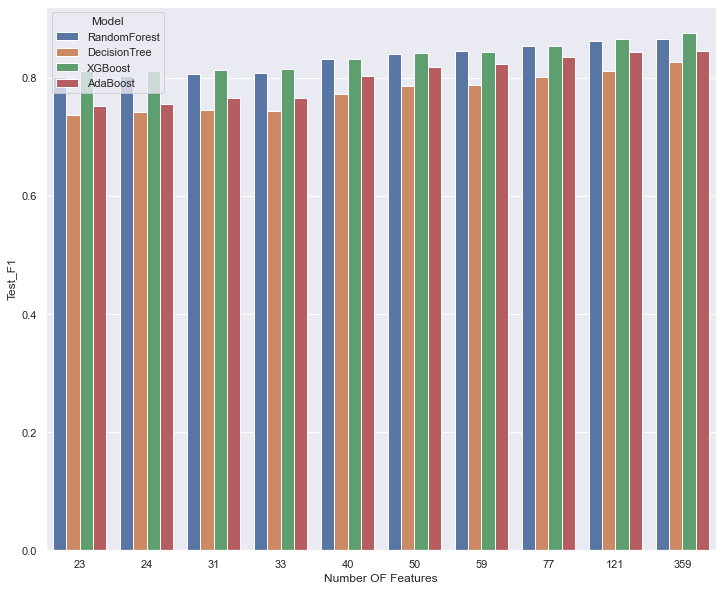

In [54]:
plt.figure(figsize=(12, 10))
sns.barplot(x=total_profile["Number OF Features"], y=total_profile["Test_F1"],
            hue=total_profile["Model"])
plt.show()

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_theme()
result = pd.read_csv("Results/Importance_thresholding.csv")


result.head()

,Model,Number OF Features,Train_acc,Test_acc,Train_F1,Test_F1,Train_roc_auc,Test_roc_auc,Train_precision,Test_precision,Train_Recall,Test_Recall
0,RandomForest,359,0.999994,0.855800,0.999994,0.865739,1.000000,0.946950,0.999997,0.865542,0.999991,0.882034
1,DecisionTree,359,1.000000,0.819942,1.000000,0.827540,1.000000,0.819942,1.000000,0.843700,1.000000,0.826997
2,XGBoost,359,0.900851,0.872089,0.899130,0.876607,0.967897,0.957394,0.913771,0.890992,0.885089,0.874194
3,AdaBoost,359,0.859881,0.845525,0.854346,0.845383,0.933019,0.923907,0.888961,0.880544,0.822378,0.822230
4,RandomForest,121,0.999989,0.853670,0.999989,0.862380,1.000000,0.943837,0.999991,0.867159,0.999987,0.873182


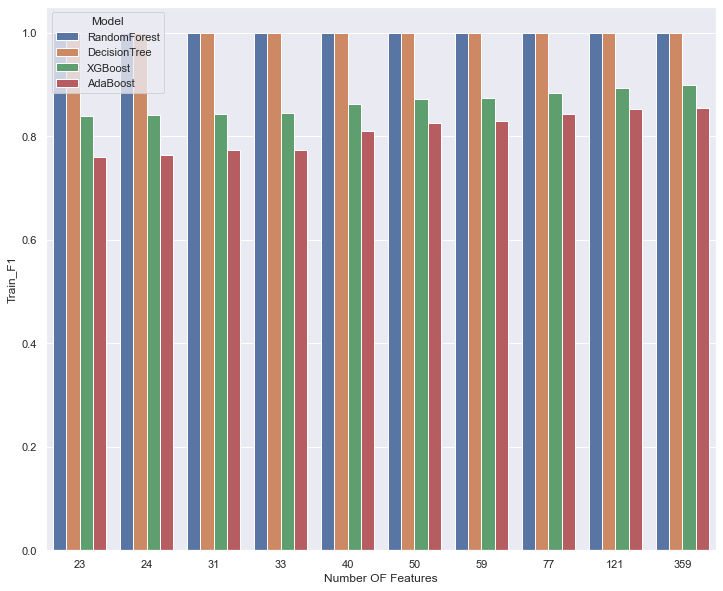

In [9]:
plt.figure(figsize=(12, 10))
sns.barplot(x=result["Number OF Features"], y=result["Train_F1"],
            hue=result["Model"])
plt.show()

# RandomForest Hyperparameter Tuning

In [6]:
import pandas as pd
import numpy as np
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier
import os

In [9]:
ths = [0.0001, 0.0012, 0.0023, 0.0034, 0.0045, 0.0056, 0.0067, 0.0078, 0.0089, 0.01  ]
X_train, X_test, y_train, y_test = read_oversampled_data()
print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)

(158148, 445) (158148, 1) (28073, 445) (28073, 1)


In [10]:
rf = RandomForestClassifier().fit(X_train, y_train)
cols = list(X_train.columns)
imp = {k:v for k,v in zip(cols, rf.feature_importances_)}
imp

C:\Users\Dell\AppData\Local\Temp\ipykernel_6528\163364845.py:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf = RandomForestClassifier().fit(X_train, y_train)


{'age': 0.0392795299058758,
 'adjustmentdisorders': 7.933177022915063e-05,
 'adltrespfl': 0.000116166638441759,
 'alcoholrelateddisorders': 0.003274245468839912,
 'allergy': 0.0020741390156771857,
 'amniosdx': 1.436866573587552e-05,
 'analrectal': 0.0002500443965758121,
 'anemia': 0.0028033686457196506,
 'aneurysm': 0.0003939836686400464,
 'anxietydisorders': 0.009588000937811408,
 'appendicitis': 9.683689853460373e-05,
 'artembolism': 3.004383409946022e-05,
 'asppneumon': 5.55703999823362e-05,
 'asthma': 0.005861302087965846,
 'attentiondeficitconductdisruptivebeha': 0.0023578912759160296,
 'backproblem': 0.0030297185012110256,
 'biliarydx': 0.0007704160618098393,
 'birthasphyx': 2.9587334951200505e-09,
 'birthtrauma': 3.997455055375976e-06,
 'blindness': 0.000578385955848064,
 'bnignutneo': 0.0006728257696368294,
 'bph': 0.0008775068810640464,
 'breastdx': 0.0005400718985684584,
 'burns': 8.750738867946775e-05,
 'carditis': 0.0006181452041947129,
 'cataract': 0.0007935674809235203,
 

In [11]:
imp = {k:v for k, v in sorted(imp.items(), key=lambda item: item[1])[::-1]}
imp

{'Gastrointestinal': 0.07058535305630224,
 'age': 0.0392795299058758,
 'triage_vital_hr': 0.03771538261189495,
 'Cardiovascular': 0.03687522479404006,
 'triage_vital_o2': 0.03274994246865772,
 'triage_vital_dbp': 0.029318145564542777,
 'triage_vital_sbp': 0.0290851746765158,
 'triage_vital_temp': 0.029002136752377776,
 'triage_vital_rr': 0.02272338448329417,
 'n_admissions': 0.021207027476366904,
 'Past Medical History': 0.020602274525686807,
 'n_surgeries': 0.019352439622265225,
 'addiction problems': 0.018830854089333188,
 'Neurologic': 0.01834582491017334,
 'n_edvisits': 0.015506146513748612,
 'ekg_count': 0.013809308978911757,
 'meds_cardiovascular': 0.013730058903690162,
 'Diabetes': 0.01268274196358191,
 'meds_gastrointestinal': 0.012470356128719414,
 'gender_Male': 0.012429775827289798,
 'Genitourinary': 0.011758241750063191,
 'gender_Female': 0.011606114462810378,
 'Cancer': 0.010340825769298298,
 'mooddisorders': 0.010227657400438038,
 'cxr_count': 0.009792862597240146,
 'anxi

### Selected Features from RandomForest Feature Importance

In [12]:
imp_selected = {k:v for k,v in imp.items() if v >= ths[-1]}
imp_selected

{'Gastrointestinal': 0.07058535305630224,
 'age': 0.0392795299058758,
 'triage_vital_hr': 0.03771538261189495,
 'Cardiovascular': 0.03687522479404006,
 'triage_vital_o2': 0.03274994246865772,
 'triage_vital_dbp': 0.029318145564542777,
 'triage_vital_sbp': 0.0290851746765158,
 'triage_vital_temp': 0.029002136752377776,
 'triage_vital_rr': 0.02272338448329417,
 'n_admissions': 0.021207027476366904,
 'Past Medical History': 0.020602274525686807,
 'n_surgeries': 0.019352439622265225,
 'addiction problems': 0.018830854089333188,
 'Neurologic': 0.01834582491017334,
 'n_edvisits': 0.015506146513748612,
 'ekg_count': 0.013809308978911757,
 'meds_cardiovascular': 0.013730058903690162,
 'Diabetes': 0.01268274196358191,
 'meds_gastrointestinal': 0.012470356128719414,
 'gender_Male': 0.012429775827289798,
 'Genitourinary': 0.011758241750063191,
 'gender_Female': 0.011606114462810378,
 'Cancer': 0.010340825769298298,
 'mooddisorders': 0.010227657400438038}

In [13]:
X_train_ = X_train[list(imp_selected.keys())]
X_test_ = X_test[list(imp_selected.keys())]
print(X_train_.shape, X_test_.shape)

(158148, 24) (28073, 24)


### Hyperparameter Search Space

In [22]:
grid = { 
    'n_estimators': [ 50, 70, 80, 100, 200],
    'max_features': ['sqrt', 'log2'],
    #'max_depth' : [2,5,10,20,30],
    'min_samples_leaf' : [0.10, 0.25, 2, 4, 6],
    'min_samples_split' : [2, 4, 6, 8, 10],
    'criterion' :['gini', 'entropy'],
    'random_state' : [32]
}

In [37]:
rf_cv = RandomizedSearchCV(estimator=RandomForestClassifier(), param_distributions=grid,
                     cv= 5, verbose=4, n_iter=50, n_jobs=-1,
                     scoring=['accuracy', 'f1', 'roc_auc', 'precision', 'recall'],
                     return_train_score=True, refit=False)
rf_cv.fit(X_train_.to_numpy(), y_train.to_numpy().ravel())

Fitting 5 folds for each of 50 candidates, totalling 250 fits


RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(), n_iter=50,
                   n_jobs=-1,
                   param_distributions={'criterion': ['gini', 'entropy'],
                                        'max_features': ['sqrt', 'log2'],
                                        'min_samples_leaf': [0.1, 0.25, 2, 4,
                                                             6],
                                        'min_samples_split': [2, 4, 6, 8, 10],
                                        'n_estimators': [50, 70, 80, 100, 200],
                                        'random_state': [32]},
                   refit=False, return_train_score=True,
                   scoring=['accuracy', 'f1', 'roc_auc', 'precision', 'recall'],
                   verbose=4)

In [44]:
rf_cv.cv_results_.keys()

dict_keys(['mean_fit_time', 'std_fit_time', 'mean_score_time', 'std_score_time', 'param_random_state', 'param_n_estimators', 'param_min_samples_split', 'param_min_samples_leaf', 'param_max_features', 'param_criterion', 'params', 'split0_test_accuracy', 'split1_test_accuracy', 'split2_test_accuracy', 'split3_test_accuracy', 'split4_test_accuracy', 'mean_test_accuracy', 'std_test_accuracy', 'rank_test_accuracy', 'split0_train_accuracy', 'split1_train_accuracy', 'split2_train_accuracy', 'split3_train_accuracy', 'split4_train_accuracy', 'mean_train_accuracy', 'std_train_accuracy', 'split0_test_f1', 'split1_test_f1', 'split2_test_f1', 'split3_test_f1', 'split4_test_f1', 'mean_test_f1', 'std_test_f1', 'rank_test_f1', 'split0_train_f1', 'split1_train_f1', 'split2_train_f1', 'split3_train_f1', 'split4_train_f1', 'mean_train_f1', 'std_train_f1', 'split0_test_roc_auc', 'split1_test_roc_auc', 'split2_test_roc_auc', 'split3_test_roc_auc', 'split4_test_roc_auc', 'mean_test_roc_auc', 'std_test_roc_a

In [46]:
np.argmax(rf_cv.cv_results_['mean_test_f1'])

24

In [48]:
rf_cv.cv_results_['mean_test_f1'][24]

0.8231036115798119

In [52]:
rf_cv.cv_results_['params'][24]

{'random_state': 32,
 'n_estimators': 100,
 'min_samples_split': 2,
 'min_samples_leaf': 2,
 'max_features': 'log2',
 'criterion': 'gini'}

In [14]:
X_train, X_test, y_train, y_test = read_oversampled_data()
X_train_ = X_train[list(imp_selected.keys())]
X_test_ = X_test[list(imp_selected.keys())]
rf = RandomForestClassifier(n_estimators=100, min_samples_leaf=2,
                            min_samples_split=2, random_state=32, max_features='log2', criterion='gini').fit(X_train_, y_train)


C:\Users\Dell\AppData\Local\Temp\ipykernel_6528\4144349308.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf = RandomForestClassifier(n_estimators=100, min_samples_leaf=2,


# Evaluate on Test set

In [33]:
import seaborn as sns
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score, recall_score,\
                            f1_score, accuracy_score, roc_auc_score

In [17]:
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier



xgb = XGBClassifier().fit(X_train_, y_train)
ada = AdaBoostClassifier().fit(X_train_, y_train)
tree = DecisionTreeClassifier( min_samples_leaf=2,
                               min_samples_split=2, random_state=32,
                               max_features='log2', criterion='gini').fit(X_train_, y_train)



C:\Users\Dell\anaconda3\envs\py\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\Dell\anaconda3\envs\py\lib\site-packages\sklearn\preprocessing\_label.py:98: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Dell\anaconda3\envs\py\lib\site-packages\sklearn\preprocessing\_label.py:133: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y,

[19:30:15] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\Dell\anaconda3\envs\py\lib\site-packages\sklearn\utils\validation.py:985: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [38]:
models = {"XGBClassifier": xgb,
          "RandomForestClassifier": rf,
          "DecisionTreeClassifier": tree,
          "AdaBoostClassifier": ada}

for name, model in models.items():
    print(f"_______{name}________")
    y_pred = model.predict(X_test_)
    
    print(f"Accurecy Score {round(accuracy_score(y_test, y_pred), 3)}")
    print(f"AUC: {round(roc_auc_score(y_test, y_pred), 3)}")
    print(f"Precision Score {round(precision_score(y_test, y_pred), 3)}")
    print(f"Recall Score{round(recall_score(y_test, y_pred), 3)}")
    print(f"F1 Score {round(f1_score(y_test, y_pred), 3)}")
    mat = confusion_matrix(y_test, y_pred)
    print("Confusion Matrix")
    print(mat)
    print(classification_report(y_test, y_pred))
    print("_"*40)

_______XGBClassifier________
Accurecy Score 0.777
AUC: 0.742
Precision Score 0.851
Recall Score0.828
F1 Score 0.839
Confusion Matrix
[[ 5450  2854]
 [ 3409 16360]]
              precision    recall  f1-score   support

           0       0.62      0.66      0.64      8304
           1       0.85      0.83      0.84     19769

    accuracy                           0.78     28073
   macro avg       0.73      0.74      0.74     28073
weighted avg       0.78      0.78      0.78     28073

________________________________________
_______RandomForestClassifier________
Accurecy Score 0.771
AUC: 0.739
Precision Score 0.852
Recall Score0.817
F1 Score 0.834
Confusion Matrix
[[ 5494  2810]
 [ 3615 16154]]
              precision    recall  f1-score   support

           0       0.60      0.66      0.63      8304
           1       0.85      0.82      0.83     19769

    accuracy                           0.77     28073
   macro avg       0.73      0.74      0.73     28073
weighted avg       0.78

# Save models

In [70]:
import joblib
import os 

base = "Final_Models"
os.makedirs(base, exist_ok=True)
for name, model in models.items():
    joblib.dump(model, os.path.join(base, f"{name}.h5"))